# Derivatives

In [1]:
import matplotlib.pyplot as plt
import sympy as sym
import sympy.plotting.plot as symplot

In [2]:
x = sym.symbols('x')

fx = 2*x**2
df = sym.diff(fx, x)

print(fx, df)

2*x**2 4*x


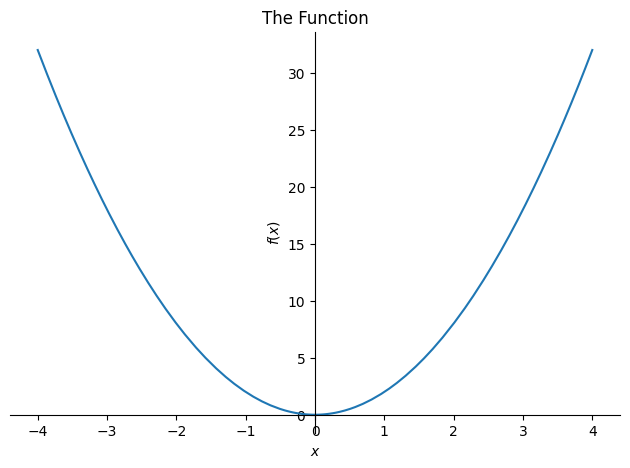

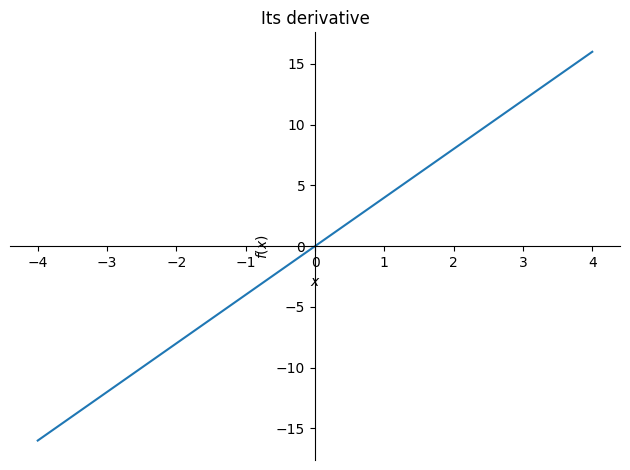

In [3]:
symplot(fx, (x, -4, 4), title="The Function")
symplot(df, (x, -4, 4), title="Its derivative");

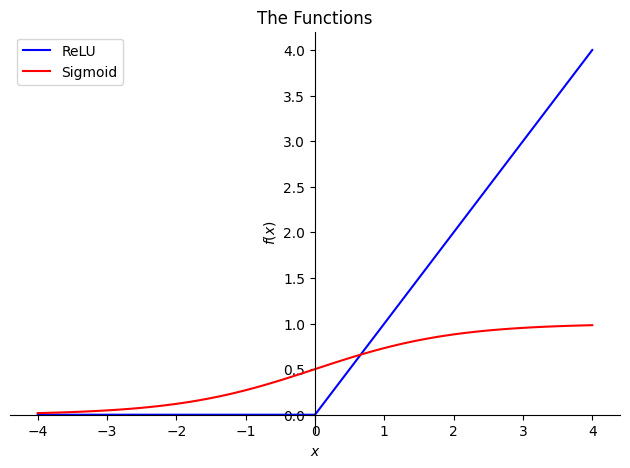

In [4]:
relu = sym.Max(0, x)
sigmoid = 1/(1+sym.exp(-x))

p = symplot(relu, (x, -4, 4), label="ReLU", show=False, line_color="blue")
p.extend(symplot(sigmoid, (x, -4, 4), label="Sigmoid", show=False, line_color="red"))
p.legend=True
p.title="The Functions"
p.show();

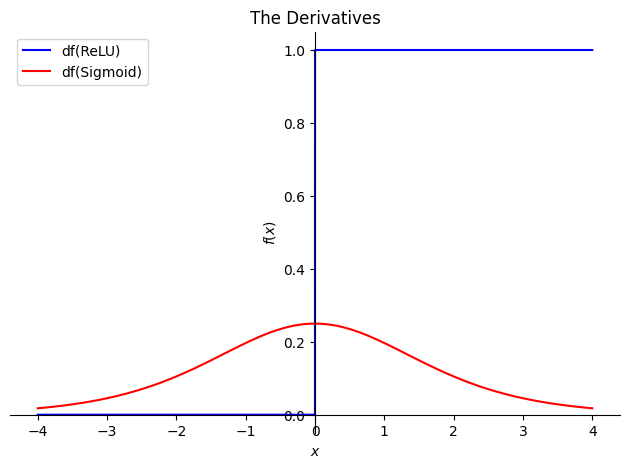

In [5]:
p = symplot(sym.diff(relu, x), (x, -4, 4), label="df(ReLU)", show=False, line_color="blue")
p.extend(symplot(sym.diff(sigmoid, x), (x, -4, 4), label="df(Sigmoid)", show=False, line_color="red"))
p.legend=True
p.title="The Derivatives"
p.show();

# Product and Chain Rule

In [6]:
import numpy as np
from IPython.display import display

In [7]:
x = sym.symbols('x')
fx = 2*x**2
gx = 4*x**3 - 3*x**4

df = sym.diff(fx)
dg = sym.diff(gx)

manual = df*gx+fx*dg

viasimpy = sym.diff(fx*gx)

display(df)
display(dg)
display(viasimpy)
display(manual)

4*x

-12*x**3 + 12*x**2

2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

2*x**2*(-12*x**3 + 12*x**2) + 4*x*(-3*x**4 + 4*x**3)

In [8]:
fx = (x**2+4*x**3)**5

df = sym.diff(fx)

display(fx)
display(df)

(4*x**3 + x**2)**5

(60*x**2 + 10*x)*(4*x**3 + x**2)**4

# Gradient Descent in 1D

In [9]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [10]:
def fx(x):
    return 3*x**2-3*x+4

def dx(x):
    return 6*x-3

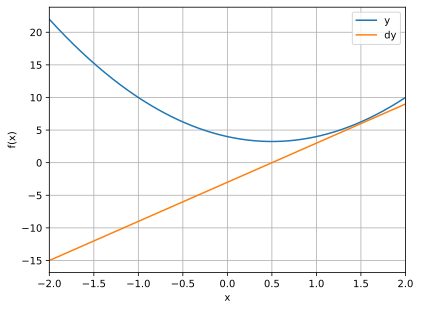

In [11]:
x = np.linspace(-2, 2, 2001)

plt.plot(x, fx(x), x, dx(x))
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy']);

In [12]:
local_min = np.random.choice(x, 1)

learning_rate = 0.01
training_epochs = 100

for i in range(training_epochs):
    grad_desc = dx(local_min)
    local_min = local_min - learning_rate*grad_desc

local_min

array([0.49649849])

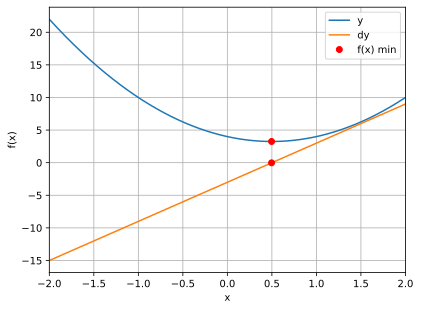

In [13]:
plt.plot(x, fx(x), x, dx(x))
plt.plot(local_min, dx(local_min), 'ro')
plt.plot(local_min, fx(local_min), 'ro')

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy', 'f(x) min']);

In [14]:
local_min = np.random.choice(x, 1)

learning_rate = 0.01
training_epochs = 100

model_local_min = np.zeros((training_epochs, 2))

for i in range(training_epochs):
    grad_desc = dx(local_min)
    local_min = local_min - learning_rate*grad_desc
    model_local_min[i] = local_min[0], grad_desc[0]

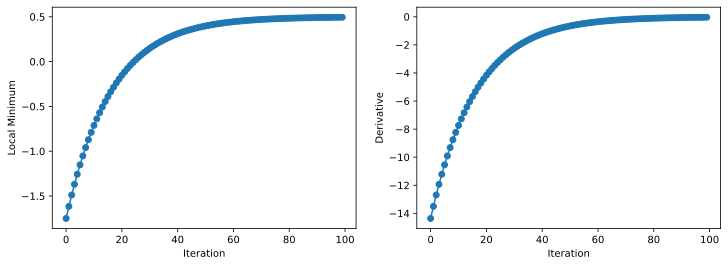

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].plot(model_local_min[:, i], 'o-')
    ax[i].set_xlabel("Iteration")
ax[0].set_ylabel("Local Minimum")
ax[1].set_ylabel("Derivative");

# Example of Gradient Descent in 1D

In [16]:
import math

def fx(x):
    return np.cos(2*np.pi*x) + x**2

def dx(x):
    return 2*x - 2*np.pi*np.sin(2*math.pi*x)

x = np.linspace(-2, 2, 2001)

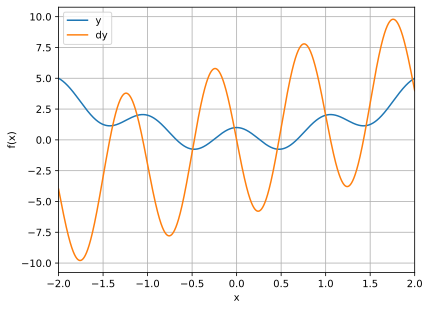

In [17]:
plt.plot(x, fx(x), x, dx(x))
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy']);

In [18]:
local_min = np.random.choice(x, 1)

learning_rate = 0.01
epochs = 100

for i in range(epochs):
    grad_desc = dx(local_min)
    local_min = local_min - grad_desc*learning_rate

local_min

array([0.47580245])

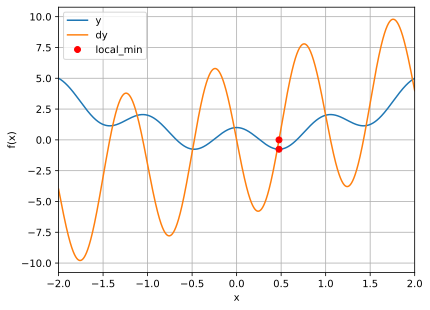

In [19]:
plt.plot(x, fx(x), x, dx(x))
plt.xlim(x[[0, -1]])
plt.plot(local_min, fx(local_min), 'ro')
plt.plot(local_min, dx(local_min), 'ro')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy', 'local_min']);

In [20]:
local_min = np.random.choice(x, 1)

learning_rate = 0.01
epochs = 20

model_local_min = np.zeros((epochs, 2))

for i in range(epochs):
    grad_desc = dx(local_min)
    local_min = local_min - learning_rate*grad_desc
    model_local_min[i] = local_min[0], grad_desc[0]

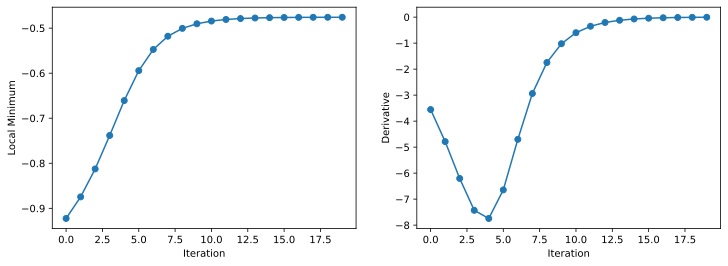

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    ax[i].plot(model_local_min[:, i], 'o-')
    ax[i].set_xlabel("Iteration")
ax[0].set_ylabel("Local Minimum")
ax[1].set_ylabel("Derivative");

# Gradient Descent in 2D

In [22]:
def peaks(x, y):
    x, y = np.meshgrid(x, y)
    z = 3*(1-x)**2*np.exp(-(x**2)-(y+1)**2)-10*(x/5-x**3-y**5)*np.exp(-x**2-y**2)-(1/3)*np.exp(-(x+1)**2-y**2)
    return z

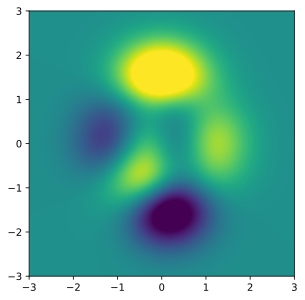

In [23]:
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)

Z = peaks(x, y)

plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin="lower");

In [24]:
sx, sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2*sym.exp(-(sx**2)-(sy+1)**2)-10*(sx/5-sx**3-sy**5)*sym.exp(-sx**2-sy**2)-1/3*sym.exp(-(sx+1)**2-sy**2)

df_x = sym.lambdify((sx, sy), sym.diff(sZ, sx), 'sympy')
df_y = sym.lambdify((sx, sy), sym.diff(sZ, sy), 'sympy')

df_x(1, 1).evalf()

-1.07369833656079

In [25]:
local_min = np.random.rand(2)*4-2
starting_point = local_min[:]

learning_rate = 0.01
epochs = 1000

trajectory = np.zeros((epochs, 2))
for i in range(epochs):
    grad_desc = np.array([df_x(local_min[0], local_min[1]).evalf(), df_y(local_min[0], local_min[1]).evalf()])
    local_min = local_min - learning_rate*grad_desc
    trajectory[i] = local_min

print(local_min, starting_point)

[3.35203035897153 0.610827984154963] [1.75669643 0.24073324]


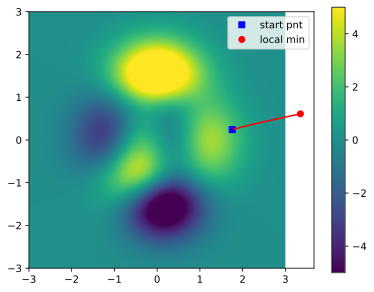

In [26]:
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin="lower")
plt.plot(starting_point[0], starting_point[1], 'bs')
plt.plot(local_min[0], local_min[1], 'ro')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r')
plt.legend(['start pnt', 'local min'])
plt.colorbar();

# Gradient Ascent in 2D

In [27]:
local_min = np.random.rand(2)*4-2
starting_point = local_min[:]

learning_rate = 0.01
epochs = 1000

trajectory = np.zeros((epochs, 2))
for i in range(epochs):
    grad_desc = np.array([df_x(local_min[0], local_min[1]).evalf(), df_y(local_min[0], local_min[1]).evalf()])
    local_min = local_min + learning_rate*grad_desc
    trajectory[i] = local_min

print(local_min, starting_point)

[1.28568469724130 -0.00484755907559369] [ 1.85121172 -1.75281326]


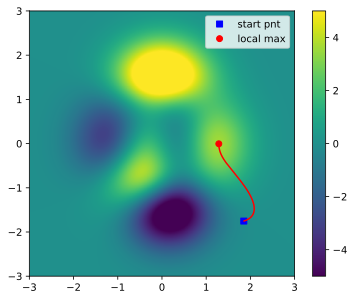

In [28]:
plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin="lower")
plt.plot(starting_point[0], starting_point[1], 'bs')
plt.plot(local_min[0], local_min[1], 'ro')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r')
plt.legend(['start pnt', 'local max'])
plt.colorbar();

# Parametric on Gradient Descent

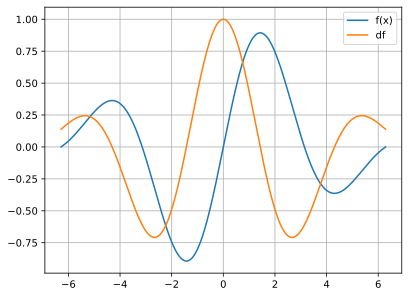

In [29]:
x = np.linspace(-2*np.pi, 2*np.pi, 401)
fx = np.sin(x)*np.exp(-x**2*0.05)
df = np.cos(x)*np.exp(-x**2*0.05) + np.sin(x)*(-0.1*x)*np.exp(-x**2*0.05)
plt.plot(x, fx, x, df)
plt.grid()
plt.legend(['f(x)', 'df']);

In [30]:
def fx(x):
    return np.sin(x)*np.exp(-x**2*0.05)

def df(x):
    return np.cos(x)*np.exp(-x**2*0.05) + np.sin(x)*(-0.1*x)*np.exp(-x**2*0.05)

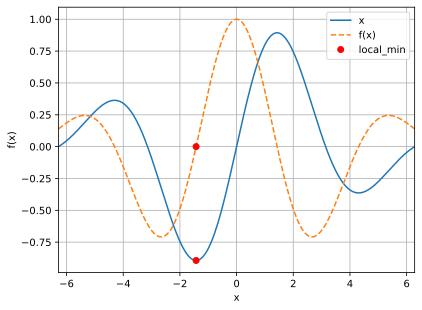

In [31]:
local_min = np.random.choice(x, 1)

learning_rate = 0.01
epochs = 1000

for i in range(epochs):
    grad_desc = df(local_min)
    local_min = local_min - learning_rate*grad_desc
    
plt.plot(x, fx(x), x, df(x), '--')
plt.plot(local_min, fx(local_min), 'ro')
plt.plot(local_min, df(local_min), 'ro')
plt.xlim(x[[0, -1]])
plt.grid()
plt.legend(['x', 'f(x)', 'local_min'])
plt.xlabel('x')
plt.ylabel('f(x)');

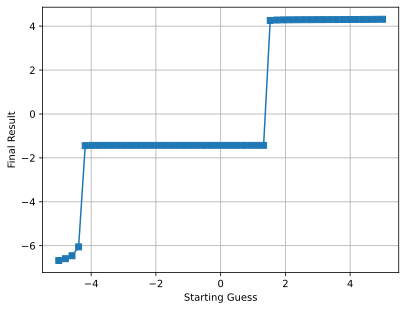

In [32]:
starting_point = np.linspace(-5, 5, 50)
final_result = np.zeros(len(starting_point))

for index, local_min in enumerate(starting_point):
    for i in range(epochs):
        grad_desc = df(local_min)
        local_min = local_min - learning_rate*grad_desc
    
    final_result[index] = local_min

plt.plot(starting_point, final_result, 's-')
plt.xlabel('Starting Guess')
plt.ylabel('Final Result')
plt.grid();

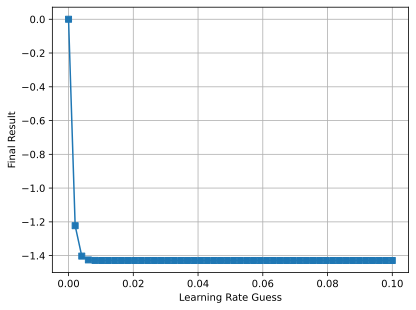

In [33]:
learning_rate = np.linspace(1e-10, 1e-1, 50)
final_result = np.zeros(len(learning_rate))

for index, learning in enumerate(learning_rate):
    local_min = 0
    for i in range(epochs):
        grad_desc = df(local_min)
        local_min = local_min - learning*grad_desc

    final_result[index] = local_min

plt.plot(learning_rate, final_result, 's-')
plt.xlabel('Learning Rate Guess')
plt.ylabel('Final Result')
plt.grid();

In [34]:
learning_rate = np.linspace(1e-10, 1e-1, 50)
epochs = np.int64(np.linspace(10, 500, 40))

final_result = np.zeros((len(learning_rate), len(epochs)))

for l_index, learning in enumerate(learning_rate):
    for e_index, epoch in enumerate(epochs):
        local_min = 0
        for i in range(epoch):
            grad_desc = df(local_min)
            local_min = local_min - learning*grad_desc
        final_result[l_index, e_index] = local_min

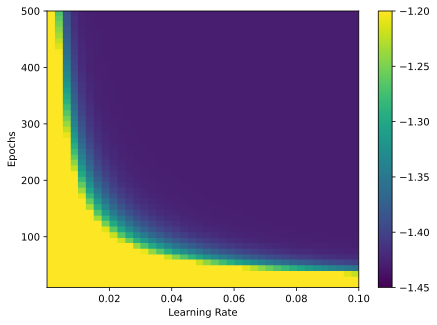

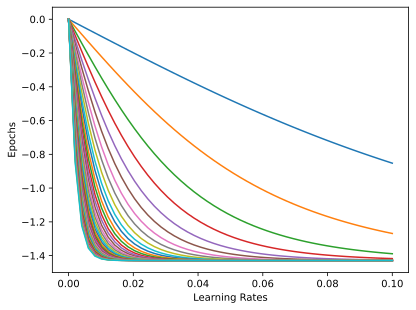

In [35]:
figure, ax = plt.subplots(figsize=(7, 5))

plt.imshow(final_result, extent=[learning_rate[0], learning_rate[-1], epochs[0], epochs[-1]], aspect="auto", origin="lower", vmin=-1.45, vmax=-1.2)
plt.xlabel("Learning Rate")
plt.ylabel("Epochs")
plt.colorbar()
plt.show()

plt.plot(learning_rate, final_result)
plt.xlabel("Learning Rates")
plt.ylabel("Epochs")
plt.show();

#  Changing Learning Rate

In [36]:
x = np.linspace(-2, 2, 2001)

def fx(x):
    return 3*x**2-3*x+4

def dx(x):
    return 6*x-3

In [37]:
local_min = np.random.choice(x, 1)
initial_value = local_min[:]

learning_rate = 0.01
epochs = 50

model_local_min_1 = np.zeros((epochs, 3))

for i in range(epochs):
    grad_desc = dx(local_min)
    local_min = local_min - learning_rate*grad_desc
    model_local_min_1[i] = local_min[0], grad_desc[0], learning_rate

In [38]:
local_min = np.random.choice(x, 1)
initial_value = local_min[:]

learning_rate = 0.01
epochs = 50

model_local_min_2 = np.zeros((epochs, 3))

for i in range(epochs):
    grad_desc = dx(local_min)
    lr = learning_rate*np.abs(grad_desc)
    local_min = local_min - lr*grad_desc
    model_local_min_2[i] = local_min[0], grad_desc[0], lr[0]

In [39]:
local_min = initial_value

learning_rate = 0.1
epochs = 50

model_local_min_3 = np.zeros((epochs, 3))

for i in range(epochs):
    grad_desc = dx(local_min)
    lr = learning_rate*(1-(i+1)/epochs)
    local_min = local_min - lr*grad_desc
    model_local_min_3[i] = local_min[0], grad_desc[0], lr

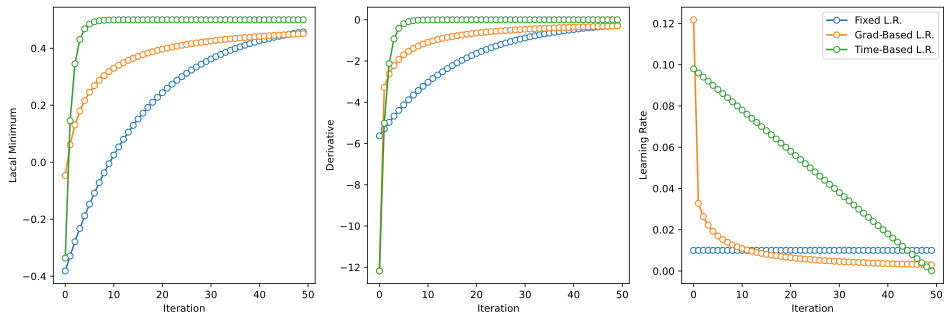

In [40]:
figure, ax = plt.subplots(1, 3, figsize=(16, 5))

for i in range(3):
    ax[i].plot(model_local_min_1[:,i], 'o-', markerfacecolor='w')
    ax[i].plot(model_local_min_2[:,i], 'o-', markerfacecolor='w')
    ax[i].plot(model_local_min_3[:,i], 'o-', markerfacecolor='w')
    ax[i].set_xlabel("Iteration")

ax[0].set_ylabel("Lacal Minimum")
ax[1].set_ylabel("Derivative")
ax[2].set_ylabel("Learning Rate")
ax[2].legend(["Fixed L.R.", "Grad-Based L.R.", "Time-Based L.R."]);